## Analysis of CHIA dataset

*Chia* ([[dataset](https://figshare.com/articles/dataset/Chia_Annotated_Datasets/11855817)][[paper](https://www.nature.com/articles/s41597-020-00620-0)]): A large annotated corpus for clinical trial elegibility criteria extracted from 1,000 interventional, Phase IV clinical trials registered in [ClinicalTrials.gov](http://ClinicalTrials.gov).

Description of the dataset:

- For each clinical trial (Example: NCT00050349) there are two **.txt** documents and two **.ann** documents, one for the inclusion criteria and one for the exclusion criteria.
- The two **.txt** documents (NCT00050349_exc.txt and NCT00050349_inc.txt) contain the correspondent free text for each inclusion or exclusion criteria respectively.
- The two **.ann** documents (NCT00050349_exc.ann and NCT00050349_inc.ann) contain the annotations for the entities and relationships in the correspondent **.txt** files. Each file has the following format:
    - Each line corresponds to a single entity or relationship. 
    - For entity lines we have: 'EntityID (Example: T1) EntityType (Example: Condition) StringStartIndes (Example: 28) StringEndIndex (Example: 35) Text (Example: metastatic carcinoid tumors)'
    - For relationship lines we have: 'RelationshipID (Example: R1) RelationshipType (Example: *has_value*) RootArgument (Example: T1) TargetArgument (Example: T2)'
    - In the case of *or* relationship we have the list of entities connected by the or.
    - List of available entities:
        1. Scope (deppending on the approach used)
	    2. Person
	    3. Condition
	    4. Drug
	    5. Observation
	    6. Measurement
	    7. Procedure
	    8. Device
	    9. Visit

We are going to analyze the corpus with scope entities.

In [19]:
import os

In [136]:
data_path = '../data/11855817/chia_with_scope'

In [137]:
# list of all files in the data path
files = os.listdir(data_path)

# filter out all files that are not .ann files
files = [f for f in files if f.endswith('.ann')]
print(len(files)) # 2000 (1000 for inclusion and 1000 for exclusion)

2000


In [138]:
# analyze the inclusion criteria files
inclusion_files = [f for f in files if f.endswith('inc.ann')]
print(len(inclusion_files)) # 1000

1000


In [139]:
dict_inc_crit = {'entity': {}, 'relation': {}, 'or': 0}
for f in inclusion_files:
    with open(os.path.join(data_path, f), 'r') as f:
        lines = f.readlines()
        for line in lines:
            if line.startswith('T'):
                term = line.strip().split('\t')[1].split()
                entity = term[0]
                if entity not in dict_inc_crit['entity']:
                    dict_inc_crit['entity'][entity] = 1
                else:
                    dict_inc_crit['entity'][entity] += 1
            elif line.startswith('R'):
                term = line.strip().split('\t')[1].split()
                relation = term[0]
                if relation not in dict_inc_crit['relation']:
                    dict_inc_crit['relation'][relation] = 1
                else:
                    dict_inc_crit['relation'][relation] += 1
            elif line.startswith('*'):
                dict_inc_crit['or'] += 1

In [24]:
# print the results for inclusion criteria
print('Inclusion criteria:')
print('Entities:')
for entity, count in dict_inc_crit['entity'].items():
    print(entity, count)
print('Relations:')
for relation, count in dict_inc_crit['relation'].items():
    print(relation, count)
print('Or:', dict_inc_crit['or'])

Inclusion criteria:
Entities:
Procedure 1594
Value 2450
Condition 2707
Negation 352
Qualifier 1446
Undefined_semantics 48
Temporal 1047
Pregnancy_considerations 59
Post-eligibility 286
Person 1232
Measurement 1850
Multiplier 375
Mood 248
Device 82
Parsing_Error 217
Not_a_criteria 34
Non-query-able 326
Reference_point 375
Visit 118
Observation 491
Informed_consent 189
Drug 759
Competing_trial 7
Non-representable 130
Grammar_Error 29
Subjective_judgement 57
Context_Error 39
Line 46
Relations:
Has_value 2333
AND 1450
Subsumes 719
Has_negation 366
Has_qualifier 1218
Has_temporal 1004
Has_multiplier 356
multi 192
Has_mood 228
Has_index 355
Has_context 100
causal 15
OR 6
v-AND 3
Or: 1227


In [140]:
# analyze the exclusion criteria files
exclusion_files = [f for f in files if f.endswith('exc.ann')]
print(len(exclusion_files)) # 1000

1000


In [141]:
dict_exc_crit = {'entity': {}, 'relation': {}, 'or': 0}
for f in exclusion_files:
    with open(os.path.join(data_path, f), 'r') as f:
        lines = f.readlines()
        for line in lines:
            if line.startswith('T'):
                term = line.strip().split('\t')[1].split()
                entity = term[0]
                if entity not in dict_exc_crit['entity']:
                    dict_exc_crit['entity'][entity] = 1
                else:
                    dict_exc_crit['entity'][entity] += 1
            elif line.startswith('R'):
                term = line.strip().split('\t')[1].split()
                relation = term[0]
                if relation not in dict_exc_crit['relation']:
                    dict_exc_crit['relation'][relation] = 1
                else:
                    dict_exc_crit['relation'][relation] += 1
            elif line.startswith('*'):
                dict_exc_crit['or'] += 1

In [142]:
# print in a nice way
print('Exclusion criteria:')
print('Entities:')
for entity, count in dict_exc_crit['entity'].items():
    print(entity, count)
print('Relations:')
for relation, count in dict_exc_crit['relation'].items():
    print(relation, count)
print('Or:', dict_inc_crit['or'])

Exclusion criteria:
Entities:
Condition 9332
Mood 338
Multiplier 296
Measurement 1455
Temporal 2071
Procedure 2001
Drug 3042
Qualifier 2711
Person 434
Scope 2959
Observation 1217
Device 304
Negation 491
Parsing_Error 391
Undefined_semantics 217
Post-eligibility 199
Non-query-able 460
Value 1552
Reference_point 559
Pregnancy_considerations 131
Visit 47
Context_Error 104
Subjective_judgement 184
Not_a_criteria 42
Grammar_Error 53
Informed_consent 69
Non-representable 174
Competing_trial 89
Intoxication_considerations 5
Line 54
c-Requires_causality 1
Relations:
Has_mood 270
Has_multiplier 268
Has_temporal 2161
AND 1656
Has_qualifier 2041
Has_scope 967
Has_negation 475
multi 311
Has_context 100
Has_value 1423
Subsumes 1251
Has_index 501
causal 22
OR 1
Or: 1202


In [143]:
# combine the dictionaries
all_ent = set(list(dict_inc_crit['entity'].keys()) + list(dict_exc_crit['entity'].keys()))
all_rel = set(list(dict_inc_crit['relation'].keys()) + list(dict_exc_crit['relation'].keys()))
dict_all_crit = {'entity': {ent :  {'inc': 0 , 'exc': 0} for ent in all_ent}, 'relation': {rel : {'inc': 0 , 'exc': 0} for rel in all_rel}, 'or': 0}
for ent in all_ent:
    if ent in dict_inc_crit['entity']:
        dict_all_crit['entity'][ent]['inc'] = dict_inc_crit['entity'][ent]
    if ent in dict_exc_crit['entity']:
        dict_all_crit['entity'][ent]['exc'] = dict_exc_crit['entity'][ent]
for rel in all_rel:
    if rel in dict_inc_crit['relation']:
        dict_all_crit['relation'][rel]['inc'] = dict_inc_crit['relation'][rel]
    if rel in dict_exc_crit['relation']:
        dict_all_crit['relation'][rel]['exc'] = dict_exc_crit['relation'][rel]
dict_all_crit['or'] = {'inc': dict_inc_crit['or'], 'exc': dict_exc_crit['or']}

{'entity': {'Intoxication_considerations': {'inc': 0, 'exc': 5},
  'Negation': {'inc': 352, 'exc': 491},
  'Measurement': {'inc': 1850, 'exc': 1455},
  'Scope': {'inc': 1295, 'exc': 2959},
  'Temporal': {'inc': 973, 'exc': 2071},
  'Drug': {'inc': 759, 'exc': 3042},
  'Non-representable': {'inc': 130, 'exc': 174},
  'Reference_point': {'inc': 375, 'exc': 559},
  'Mood': {'inc': 235, 'exc': 338},
  'Visit': {'inc': 118, 'exc': 47},
  'Subjective_judgement': {'inc': 57, 'exc': 184},
  'Procedure': {'inc': 1594, 'exc': 2001},
  'Parsing_Error': {'inc': 217, 'exc': 391},
  'Pregnancy_considerations': {'inc': 59, 'exc': 131},
  'Non-query-able': {'inc': 326, 'exc': 460},
  'Informed_consent': {'inc': 189, 'exc': 69},
  'Observation': {'inc': 578, 'exc': 1217},
  'Qualifier': {'inc': 1446, 'exc': 2711},
  'Device': {'inc': 82, 'exc': 304},
  'Multiplier': {'inc': 375, 'exc': 296},
  'Condition': {'inc': 2707, 'exc': 9332},
  'Grammar_Error': {'inc': 29, 'exc': 53},
  'Undefined_semantics': {

In [144]:
entities_df = pd.DataFrame.from_dict(dict_all_crit['entity'], orient='index')
entities_df['total'] = entities_df['inc'] + entities_df['exc']
entities_df.sort_values(by=['total'], ascending=False, inplace=True)
entities_df.head(15)

,inc,exc,total
Condition,2707,9332,12039
Scope,1295,2959,4254
Qualifier,1446,2711,4157
Value,2450,1552,4002
Drug,759,3042,3801
Procedure,1594,2001,3595
Measurement,1850,1455,3305
Temporal,973,2071,3044
Observation,578,1217,1795
Person,1232,434,1666


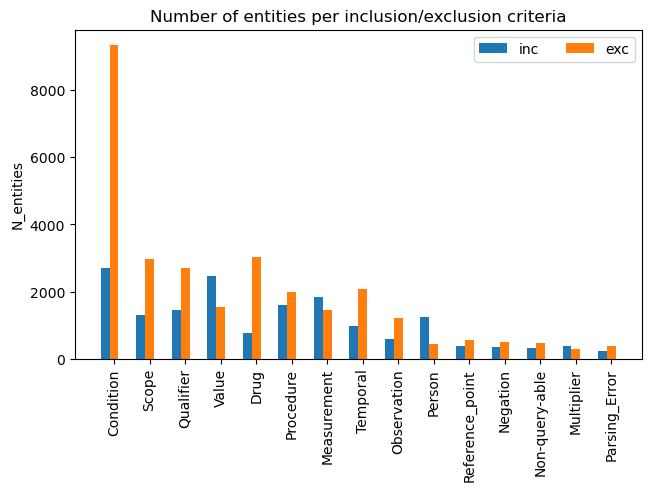

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# plot the entities
x = np.arange(15)  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for l in ['inc', 'exc']:
    offset = width * multiplier
    v = entities_df[l][:15]
    rects = ax.bar(x + offset, v, width, label=l)
    multiplier += 1

ax.set_ylabel('N_entities')
ax.set_title('Number of entities per inclusion/exclusion criteria')
ax.set_xticks(x + width, entities_df.index[:15])
ax.legend(loc='upper right', ncols=2)

plt.xticks(rotation=90)

plt.show()

In [147]:
# now analyze the relations
relations_df = pd.DataFrame.from_dict(dict_all_crit['relation'], orient='index')
relations_df['total'] = relations_df['inc'] + relations_df['exc']
relations_df.sort_values(by=['total'], ascending=False, inplace=True)
relations_df.head(15)

,inc,exc,total
Has_value,2220,1423,3643
Has_temporal,931,2161,3092
Has_qualifier,999,2041,3040
AND,1010,1656,2666
Subsumes,624,1251,1875
Has_scope,546,967,1513
Has_index,328,501,829
Has_negation,354,475,829
Has_multiplier,334,268,602
multi,191,311,502


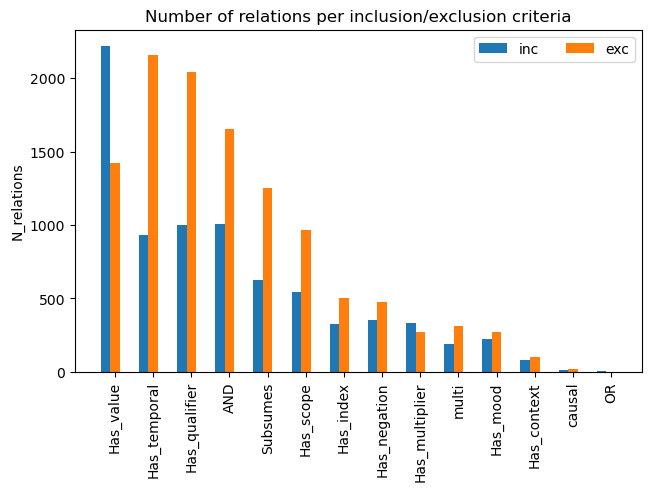

In [148]:
# plot the relations
x = np.arange(len(relations_df.index))
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for l in ['inc', 'exc']:
    offset = width * multiplier
    v = relations_df[l]
    rects = ax.bar(x + offset, v, width, label=l)
    multiplier += 1

ax.set_ylabel('N_relations')
ax.set_title('Number of relations per inclusion/exclusion criteria')
ax.set_xticks(x + width, relations_df.index)
ax.legend(loc='upper right', ncols=2)

plt.xticks(rotation=90)
plt.show()